In [ ]:
!pip install -q langchain openai==0.28.1 tiktoken chromadb

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 803.3/803.3 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.0/77.0 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 13.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 509.0/509.0 kB 14.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 17.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 208.0/208.0 kB 14.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.2/48.2 kB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 19.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.0/92.0 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.3/60.3 kB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.4/5.4 MB 30.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.4/6.4 MB 40.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
!wget https://github.com/chatgpt-kr/chatgpt-api-tutorial/raw/main/ch05/data.zip

--2024-01-05 04:30:44--  https://github.com/chatgpt-kr/chatgpt-api-tutorial/raw/main/ch05/data.zip
Resolving github.com (github.com)... 20.27.177.113
Connecting to github.com (github.com)|20.27.177.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/chatgpt-kr/chatgpt-api-tutorial/main/ch05/data.zip [following]
--2024-01-05 04:30:44--  https://raw.githubusercontent.com/chatgpt-kr/chatgpt-api-tutorial/main/ch05/data.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 835816 (816K) [application/zip]
Saving to: ‘data.zip’

data.zip            100%[===================>] 816.23K  5.13MB/s    in 0.2s    

2024-01-05 04:30:46 (5.13 MB/s) - ‘data.zip’ saved [835816/835816]



In [ ]:
!unzip data

Archive:  data.zip
  inflating: 1.txt                   
  inflating: 10.txt                  
  inflating: 11.txt                  
  inflating: 12.txt                  
  inflating: 13.txt                  
  inflating: 14.txt                  
  inflating: 15.txt                  
  inflating: 16.txt                  
  inflating: 17.txt                  
  inflating: 18.txt                  
  inflating: 19.txt                  
  inflating: 2.txt                   
  inflating: 20.txt                  
  inflating: 21.txt                  
  inflating: 22.txt                  
  inflating: 23.txt                  
  inflating: 24.txt                  
  inflating: 25.txt                  
  inflating: 26.txt                  
  inflating: 27.txt                  
  inflating: 28.txt                  
  inflating: 29.txt                  
  inflating: 3.txt                   
  inflating: 30.txt                  
  inflating: 31.txt                  
  inflating: 32.txt            

# Langchain setting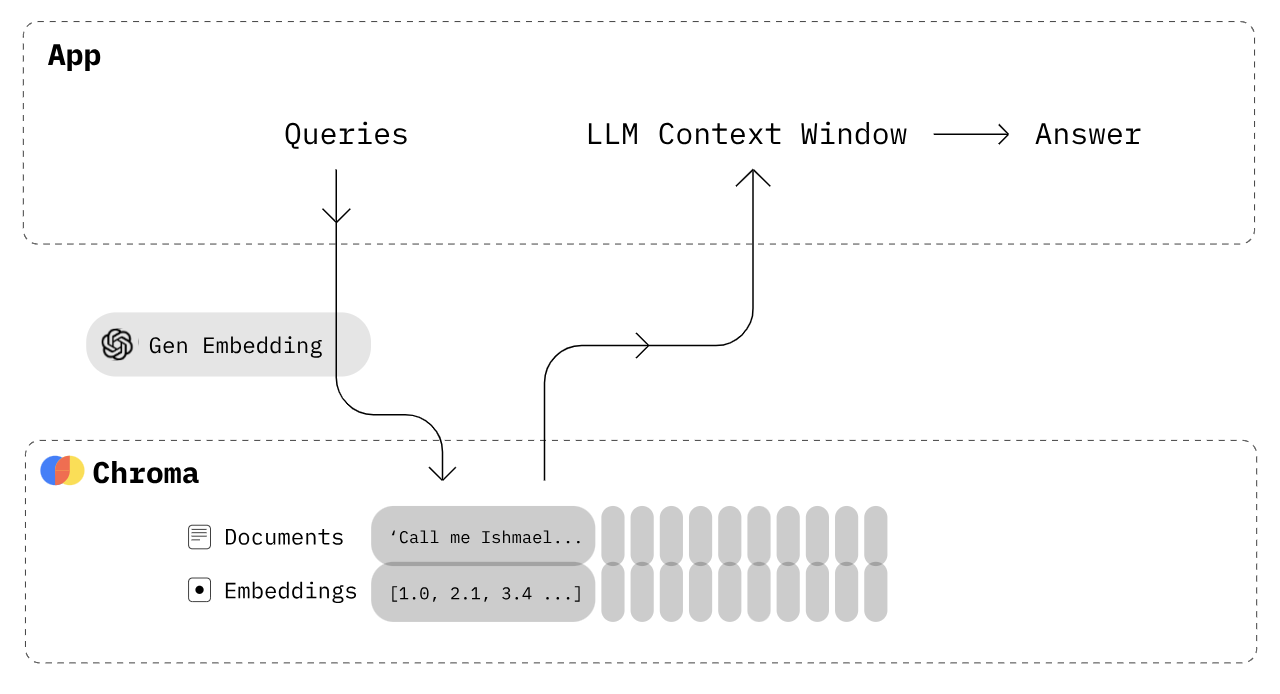

In [ ]:

import os

os.environ["OPENAI_API_KEY"] = ""


In [ ]:
from langchain.vectorstores import Chroma
from langchain.embeddings import OpenAIEmbeddings
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain.chat_models import ChatOpenAI
from langchain.chains import RetrievalQA
from langchain.document_loaders import TextLoader
from langchain.document_loaders import DirectoryLoader
from collections import Counter

In [ ]:
# documents loader (*디렉토리로더는 파일을 순서대로 로드하지는 않는다.)
loader = DirectoryLoader('.', glob="*.txt", loader_cls = TextLoader)
documents = loader.load()
print('문서의 개수 :', len(documents))

문서의 개수 : 57


In [ ]:

print('1번 문서 :', documents[1])
print('-' * 20)
print('17번 문서 :', documents[17])
print('-' * 20)

1번 문서 : page_content='정책제목: 캠퍼스타운 혁신을 통해 청년희망, 지역경제 활성화\n서울시는 창업을 확산하고 청년 창업을 활성화하기 위해 서울 전역의 28개 캠퍼스타운에서 지원 시스템을 강화하는 정책을 추진하고 있습니다. 이 정책은 2023년 1월 1일부터 2023년 12월 31일까지 사업운영이 이루어지며, 사업 신청은 동일한 기간 동안 가능합니다. 창업팀 상시 육성을 목표로 하며, 종합형 16개와 단위형 12개의 지원규모를 가지고 있습니다. 신청자격은 19세부터 39세까지이며, 대학과 자치구의 공동 제안 사업에 참여할 수 있습니다. 학력, 전공 요건, 취업 상태, 특화 분야 요건은 제한이 없으며, 참여 제한 대상은 개별 공고를 참조해야 합니다. 신청 방법은 각 캠퍼스타운의 개별 공고를 확인하시기 바랍니다. 운영기관은 서울시청 캠퍼스타운 활성화과입니다. 자세한 내용은 https://campustown.seoul.go.kr/site/main/university/list에서 확인하실 수 있습니다.' metadata={'source': '45.txt'}
--------------------
17번 문서 : page_content='정책 제목: 서울형 뉴딜 일자리\n정책 유형은 "일자리"이며, 이 정책은 서울시청 일자리정책과에서 주관하고 있습니다. 해당 정책은 미취업자들을 대상으로 전문적인 일 경험 제공과 직무교육, 취/창업 지원을 통해 안정적인 민간일자리로의 연계를 도모하는 것을 목표로 합니다. 지원 내용으로는 월 최대 임금 236만원의 지급과 최대 23개월간의 안정적인 근무 가능성(풀타임 또는 파트타임 선택 가능), 취업 교육 및 자격증 응시비용 지원 등이 포함됩니다. 신청자격은 18세부터 100세까지이며, 학력이나 전공 요건에는 제한이 없습니다. 해당 정책은 미취업자를 대상으로 하며, 참여 제한 대상 및 신청 방법은 개별 공고를 확인하시면 됩니다. 사업 운영기간은 2023년 1월 1일부터 2023년 12월 31일까지이며, 신청은 서울일자리 포털

In [ ]:
#Split texts
text_splitter = RecursiveCharacterTextSplitter(chunk_size=1000, chunk_overlap=200)
texts = text_splitter.split_documents(documents)

print('분할된 텍스트의 개수 : ', len(texts))

분할된 텍스트의 개수 :  64


In [ ]:
print(texts[0])

page_content='정책 이름: 청년참여 활성화 및 청년참여기구 운영 지원\n서울시청 미래청년기획단에서는 사회참여를 촉진하기 위해 청년의 시정 참여 및 청년 시각을 반영한 미래사회 대응을 위한 다양한 정책을 발굴하는 정책을 추진합니다. 이를 위해 청년참여기구의 운영을 지원하고 청년의 정책 제안과 청년 자율 예산 편성 역량을 강화합니다. 이 프로그램은 서울청년참여기구의 구성과 운영을 지원하며, 분과별 소주제 모임 공간을 제공하고 캠페인을 진행합니다. 또한, 분과 회의 및 실국 간담회를 운영하고 서울청년참여기구 총회를 개최합니다. 신청자격은 서울에서 거주하고 활동하는 19세에서 39세의 청년이면 누구나 신청할 수 있습니다. 학력, 전공, 취업 상태, 특화 분야에 대한 제한은 없습니다. 신청 방법과 신청 절차는 서울청년포털 홈페이지를 참조하시면 됩니다. 이 프로그램은 https://youth.seoul.go.kr/site/youthnet/content/NET020-01에서 자세한 정보를 확인할 수 있습니다. 운영기관은 서울시청 미래청년기획단입니다. 추가로 참고할 사이트로는 https://youth.seoul.go.kr/youthnet/를 확인하실 수 있습니다.' metadata={'source': '7.txt'}


In [ ]:
source_list = []
for i in range(0, len(texts)):
  source_list.append(texts[i].metadata['source'])

element_counts = Counter(source_list)
filtered_counts = {key: value for key, value in element_counts.items() if value >=2}
print('2개 이상으로 분할된 문서 : ', filtered_counts)
print('분할된 텍스트의 개수 : ',len(documents)+ len(filtered_counts))

2개 이상으로 분할된 문서 :  {'40.txt': 2, '23.txt': 2, '49.txt': 2, '22.txt': 2, '48.txt': 2, '31.txt': 2, '36.txt': 2}
분할된 텍스트의 개수 :  64


# ChromaDB


In [ ]:
#ChromaDB 객체생성
embedding = OpenAIEmbeddings()
vectordb = Chroma.from_documents(
    documents=texts,
    embedding=embedding
)

In [ ]:
#추천만들기
retriver = vectordb.as_retriever()

In [ ]:
#연관도를 활용
docs = retriver.get_relevant_documents("국내 스타트업 지원을 위한 정책이 있어?")
print('유사 문서 개수 : ', len(docs))
print('첫 번째 유사 문서 : ', docs[0])
print('--' * 20)
print('각 유사 문서의 문서 출처 :')
for doc in docs:
  print(doc.metadata["source"])


유사 문서 개수 :  4
첫 번째 유사 문서 :  page_content='정책제목: 일생활균형 서울형 강소기업 지원\n서울시는 청년과 중소기업의 일자리 미스매치 문제 해소를 위해 서울형 강소기업 발굴 및 지원을 통해 청년에게는 우수 중소기업에서 일할 기회를, 중소기업에게는 청년 인재를 채용할 기회를 제공하는 일자리 정책을 추진하고 있습니다. 이 정책은 2023년 1월 1일부터 2023년 12월 31일까지 사업운영이 이루어지며, 사업 신청은 동일한 기간 동안 가능합니다. 지원 내용으로는 근무 환경 개선금, 육아휴직 대체 청년 인턴 인건비 지원 등이 포함되어 있습니다. 추가로 50개 기업이 추가 선정될 예정입니다. 신청자격은 서울시 소재 중소기업 중 공공기관 인증을 받은 기업으로 제한되며, 기업의 재무제표 확인을 위해 2년의 최소 업력이 필요합니다. 신청은 해당 사이트(http://www.seouljobnow.co.kr/)에서 온라인으로 진행하며, 제출해야 할 서류는 공고를 참조하시기 바랍니다. 심사 및 발표는 일자리 창출 실적, 근로자 처우 수준, 기업 우수성, 고용 안정성 및 임금 수준, 복지제도 및 일생활 균형제도 운영 등을 기준으로 이루어집니다. 운영기관은 서울시청 일자리정책과입니다. 자세한 내용은 http://www.seouljobnow.co.kr/에서 확인하실 수 있습니다.' metadata={'source': '46.txt'}
----------------------------------------
각 유사 문서의 문서 출처 :
46.txt
44.txt
25.txt
41.txt


In [ ]:
# 2개 반환
retriever = vectordb.as_retriever(search_kwargs = {"k": 2})

In [ ]:
docs = retriever.get_relevant_documents("신혼부부를 위한 정책이 있어?")

for doc in docs:
  print(doc.metadata["source"])

23.txt
23.txt


# chain 만들기


In [ ]:
# question chain
qa_chain = RetrievalQA.from_chain_type(
    llm=ChatOpenAI(model_name="gpt-3.5-turbo", temperature=0),
    chain_type="stuff",
    retriever=retriever,
    return_source_documents=True)

In [ ]:
#Query
input_text = "신혼부부를 위한 정책이 궁금합니다."
response = qa_chain(input_text)
print(response)

{'query': '신혼부부를 위한 정책이 궁금합니다.', 'result': '신혼부부를 위한 정책은 서울시에서 운영하는 정책으로, 주거마련에 대한 부담을 완화하여 혼인수 감소와 출산기피 현상을 해결하고, 더 나은 주거환경을 제공하기 위해 마련되었습니다. 이 정책은 대상 가구를 총 8,000가구로 제한하며, 지원 기간은 2023년 1월 1일부터 2023년 12월 31일까지입니다. 자세한 내용은 서울주거포털(https://housing.seoul.go.kr)에서 확인하실 수 있습니다.', 'source_documents': [Document(page_content='이 정책은 주거마련에 대한 부담을 완화하여 혼인수 감소와 출산기피 현상을 해결하고, 더 나은 주거환경을 제공하기 위해 서울시에서 운영하는 정책입니다. 대상 가구는 총 8,000가구로 제한되며, 지원 기간은 2023년 1월 1일부터 2023년 12월 31일까지입니다.\n\n이 정책에 참여하기 위해서는 다음의 신청자격을 충족해야 합니다. 먼저, 서울시민이거나 대출 후 1개월 이내에 서울로 전입 예정이어야 합니다. 또한 혼인신고일 기준으로 7년 이내의 신혼부부이거나 서울시 추천서 신청일로부터 6개월 이내에 결혼식 예정인 예비신혼부부여야 합니다. 부부의 합산 연소득은 9천 7백만원 이하여야 하며, 본인 및 배우자는 무주택자여야 합니다. 또한, 특정 주택 조건을 충족하는 주택의 임대차계약을 체결한 자에게 대출이 지원됩니다.\n\n이 정책은 서울주거포털(https://housing.seoul.go.kr)을 통해 온라인으로 신청할 수 있습니다. 필요한 제출서류로는 주민등록등본, 가족관계증명서, 혼인관계증명서, 그리고 임대차계약서가 있습니다.\n\n이 정책은 서울시청 주택정책과에서 운영되며, 자세한 사항은 해당 사이트(https://housing.seoul.go.kr)에서 확인하실 수 있습니다.', metadata={'source': '23.txt'}), Document(page_content='정책제목: 신혼부부

In [ ]:
# define a method #1
def get_chatbot_response(input_text):
  response=qa_chain(input_text)
  return response

In [ ]:
# define a method #2
def get_response(input_text):
  print(response['result'].strip())
  print('\n문서 출처:')
  for source in response['source_documents']:
    print(source.metadata['source'])

In [ ]:
#result 1
result=get_chatbot_response(input_text)
print(result)

{'query': '신혼부부를 위한 정책이 궁금합니다.', 'result': '신혼부부를 위한 정책은 서울시에서 운영하는 정책으로, 주거마련에 대한 부담을 완화하여 혼인수 감소와 출산기피 현상을 해결하고, 더 나은 주거환경을 제공하기 위해 마련되었습니다. 이 정책은 대상 가구를 총 8,000가구로 제한하며, 지원 기간은 2023년 1월 1일부터 2023년 12월 31일까지입니다. 자세한 내용은 서울주거포털(https://housing.seoul.go.kr)에서 확인하실 수 있습니다.', 'source_documents': [Document(page_content='이 정책은 주거마련에 대한 부담을 완화하여 혼인수 감소와 출산기피 현상을 해결하고, 더 나은 주거환경을 제공하기 위해 서울시에서 운영하는 정책입니다. 대상 가구는 총 8,000가구로 제한되며, 지원 기간은 2023년 1월 1일부터 2023년 12월 31일까지입니다.\n\n이 정책에 참여하기 위해서는 다음의 신청자격을 충족해야 합니다. 먼저, 서울시민이거나 대출 후 1개월 이내에 서울로 전입 예정이어야 합니다. 또한 혼인신고일 기준으로 7년 이내의 신혼부부이거나 서울시 추천서 신청일로부터 6개월 이내에 결혼식 예정인 예비신혼부부여야 합니다. 부부의 합산 연소득은 9천 7백만원 이하여야 하며, 본인 및 배우자는 무주택자여야 합니다. 또한, 특정 주택 조건을 충족하는 주택의 임대차계약을 체결한 자에게 대출이 지원됩니다.\n\n이 정책은 서울주거포털(https://housing.seoul.go.kr)을 통해 온라인으로 신청할 수 있습니다. 필요한 제출서류로는 주민등록등본, 가족관계증명서, 혼인관계증명서, 그리고 임대차계약서가 있습니다.\n\n이 정책은 서울시청 주택정책과에서 운영되며, 자세한 사항은 해당 사이트(https://housing.seoul.go.kr)에서 확인하실 수 있습니다.', metadata={'source': '23.txt'}), Document(page_content='정책제목: 신혼부부

In [ ]:
#result 2
result2 = get_response(input_text)

신혼부부를 위한 정책은 서울시에서 운영하는 정책으로, 주거마련에 대한 부담을 완화하여 혼인수 감소와 출산기피 현상을 해결하고, 더 나은 주거환경을 제공하기 위해 마련되었습니다. 이 정책은 대상 가구를 총 8,000가구로 제한하며, 지원 기간은 2023년 1월 1일부터 2023년 12월 31일까지입니다. 자세한 내용은 서울주거포털(https://housing.seoul.go.kr)에서 확인하실 수 있습니다.

문서 출처:
23.txt
23.txt


In [ ]:
input_text = "신혼 부부의 신혼집 마련을 위한 정책이 있을까?"
chatbot_response = qa_chain(input_text)
get_response(chatbot_response)

신혼부부를 위한 정책은 서울시에서 운영하는 정책으로, 주거마련에 대한 부담을 완화하여 혼인수 감소와 출산기피 현상을 해결하고, 더 나은 주거환경을 제공하기 위해 마련되었습니다. 이 정책은 대상 가구를 총 8,000가구로 제한하며, 지원 기간은 2023년 1월 1일부터 2023년 12월 31일까지입니다. 자세한 내용은 서울주거포털(https://housing.seoul.go.kr)에서 확인하실 수 있습니다.

문서 출처:
23.txt
23.txt


In [ ]:
#chain을 만들었으니 다른 질문으로 테스트
input_text = "전세자금이 부족한 사람을 위한 정책 이름이 뭐야?"
llm_response = qa_chain(input_text)
get_chatbot_response(llm_response)

{'query': '전세자금이 부족한 사람을 위한 정책 이름이 뭐야?',
 'result': '정책 이름은 "희망두배 청년통장"입니다.',
 'source_documents': [Document(page_content='정책제목: 희망두배 청년통장\n서울시청 안심돌봄복지과에서는 저소득 근로 청년들의 자립의욕 고취와 빈곤층 전락을 방지하기 위해 재정적 지원을 통한 자립을 지원하는 정책을 운영하고 있습니다. 이 정책은 교육비, 주거비, 결혼자금, 창업운영자금 등을 위한 저축을 지원하는 내용을 포함하고 있습니다.\n\n지원 내용은 다음과 같습니다:\n\n저축 목적에 따른 월 10만원 또는 15만원의 저축액 선택 (저축기간 2년 또는 3년)\n지원 금액은 본인이 적립한 금액의 100%로 지원되며, 10만원 저축 시 2년형은 480만원 이상(이자 포함), 3년형은 720만원 이상(이자 포함), 15만원 저축 시 2년형은 720만원 이상(이자 포함), 3년형은 1,080만원 이상(이자 포함)의 지원이 이루어집니다.\n신청자격은 18세에서 34세까지이며, 서울시 거주자이고 공고일 현재 근로 중인 자격 요건을 모두 충족하는 경우 신청할 수 있습니다.\n\n신청은 방문접수, 우편 신청(도착분 기준 18:00까지 동주민센터 도착), 이메일 신청(접수 마감일 18:00까지 도착) 방법으로 이루어집니다. 신청 기한 내에 제출서류가 누락되거나 식별이 불가능한 경우 대상자 선정에서 제외될 수 있습니다. 이메일로 제출할 경우 원본 스캔 또는 이미지 촬영하여 PDF, JPG, PNG 파일 형식으로 제출해야 합니다.\n\n선정 결과는 추후에 공지될 예정이며, 자세한 신청 방법과 필요한 서류는 서울시복지재단, 서울시 및 25개 자치구 홈페이지에서 확인하실 수 있습니다. 기타 문의 사항은 1688-1453, 120다산콜, 해당 주소지의 자치구 및 동주민센터로 문의하시면 됩니다.\n\n이 정책은 서울시복지재단에서 운영되는 정책을 운영하고 있습니다. 자세한 내용과 신청 방법은 서울시복지재단의 홈페

In [ ]:
# 질문 이어서
query = "희망두배 청년통장의 지원 조건은?"
llm_response = qa_chain(query)
get_response(llm_response)

신혼부부를 위한 정책은 서울시에서 운영하는 정책으로, 주거마련에 대한 부담을 완화하여 혼인수 감소와 출산기피 현상을 해결하고, 더 나은 주거환경을 제공하기 위해 마련되었습니다. 이 정책은 대상 가구를 총 8,000가구로 제한하며, 지원 기간은 2023년 1월 1일부터 2023년 12월 31일까지입니다. 자세한 내용은 서울주거포털(https://housing.seoul.go.kr)에서 확인하실 수 있습니다.

문서 출처:
23.txt
23.txt


# Gradio

In [ ]:
# install
!pip install gradio
!pip install --upgrade gradio
# !pip install --upgrade pydantic

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 31.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 305.1/305.1 kB 28.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.9/75.9 kB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.7/138.7 kB 16.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 381.9/381.9 kB 32.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 16.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 49.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.9/76.9 kB 11.3 MB/s eta 0:00:00
  Created wheel for ffmpy: filename=ffmpy-0.3.1-py3-none-any.whl size=5579 sha256=ea6809258f2ad20cc16e9b3c6333c82ac95cbb052364d7b2d1d82376cc445293
  Stored in directory: /root/.cache/pip/wheels/01/a6/d1/1c0828c304a4283b2c1639

In [ ]:
!pip show pydantic



Name: pydantic
Version: 2.5.3
Summary: Data validation using Python type hints
Home-page: 
Author: 
Author-email: Samuel Colvin <s@muelcolvin.com>, Eric Jolibois <em.jolibois@gmail.com>, Hasan Ramezani <hasan.r67@gmail.com>, Adrian Garcia Badaracco <1755071+adriangb@users.noreply.github.com>, Terrence Dorsey <terry@pydantic.dev>, David Montague <david@pydantic.dev>, Serge Matveenko <lig@countzero.co>, Marcelo Trylesinski <marcelotryle@gmail.com>, Sydney Runkle <sydneymarierunkle@gmail.com>, David Hewitt <mail@davidhewitt.io>
License: 
Location: /usr/local/lib/python3.10/dist-packages
Requires: annotated-types, pydantic-core, typing-extensions
Required-by: chromadb, confection, fastapi, gradio, inflect, langchain, langchain-core, langsmith, lida, llmx, spacy, thinc


In [ ]:
!pip install --upgrade gradio


To create a public link, set share=True in launch().
Running on https://localhost:7860/

라는 식의 문구가 나오면 위의 localhost로 시작하는 주소를 클릭하세요.

In [ ]:
!pip install gradio==3.48.0 #주의 계속 import에러 떠서 해당 버전으로 하니 해결됨.

In [ ]:
import gradio as gr

# 인터페이스를 생성.
with gr.Blocks() as demo:
    chatbot = gr.Chatbot(label="청년정책챗봇") # 청년정책챗봇 레이블을 좌측 상단에 구성
    msg = gr.Textbox(label="질문해주세요!")  # 하단의 채팅창의 레이블
    clear = gr.Button("대화 초기화")  # 대화 초기화 버튼

    # 챗봇의 답변을 처리하는 함수
    def respond(message, chat_history):
      result = qa_chain(message)
      bot_message = result['result']
      bot_message += ' # sources :'

      # 답변의 출처를 표기
      for i, doc in enumerate(result['source_documents']):
          bot_message += '[' + str(i+1) + '] ' + doc.metadata['source'] + ' '

      # 채팅 기록에 사용자의 메시지와 봇의 응답을 추가.
      chat_history.append((message, bot_message))
      return "", chat_history

    # 사용자의 입력을 제출(submit)하면 respond 함수가 호출.
    msg.submit(respond, [msg, chatbot], [msg, chatbot])

    # '초기화' 버튼을 클릭하면 채팅 기록을 초기화.
    clear.click(lambda: None, None, chatbot, queue=False)

# 인터페이스 실행.
demo.launch(debug=True)

Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Running on public URL: https://5cc9c6c55fad79d399.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)
